In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dice_players import mlplayer as rlplayer, dplayer, Dado

# Objeto Dado

In [12]:
dado_size = 6
turnos = 3
D = Dado(dado_size)

# Player with RL

In [13]:
P = rlplayer(D, [0, 1], turnos)
P.play_n(100000)
M = P.get_m()

turnos_id = [f't{i+1}.' for i in range(3)]
index_dice = [str(i+1) for i in range(6)]
index = [i+j for i in turnos_id for j in index_dice]
df = pd.DataFrame(M, index=index, columns=['Take', 'Play'])

# Create a new player, already trained
J = rlplayer(D, [0, 1], turnos)
J.clone(P)
# Stop exploration
J.consolidate()
# Play again
n = 100000
J.play_n(n)
total_reward = J.TotalReward
print (f'Average reward: {J.avg_reward}')

All games have ended
All games have ended
Average reward: 4.668330000000072


In [14]:
df

,Take,Play
t1.1,1.0,4.197418
t1.2,2.0,4.201853
t1.3,3.0,4.210773
t1.4,4.0,4.214690
t1.5,5.0,4.078283
t1.6,6.0,4.212048
t2.1,1.0,3.500772
t2.2,2.0,3.512638
t2.3,3.0,3.480325
t2.4,4.0,3.418251


In [15]:
Ph = P.full_history
sum(Ph)/len(Ph)

4.59907

In [16]:
w = 20
ph_short = [sum(Ph[i:i+w])/w for i in range(int(len(Ph)/w))]

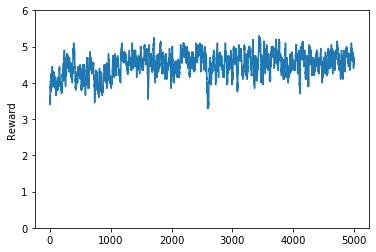

In [17]:
%matplotlib inline
plt.plot(ph_short)
plt.ylim(0, 6)
plt.ylabel('Reward')
plt.show()

In [18]:
P = rlplayer(D, [0, 1], turnos)
P.play_n(50000)

# Create a new player, already trained
J = rlplayer(D, [0, 1], turnos)
J.clone(P)
# Stop learning
J.consolidate()
# Play again
n = 50000
J.play_n(n)
print (f'Average reward: {J.avg_reward}')

All games have ended
All games have ended
Average reward: 4.657919999999958


In [19]:
M = J.m
turnos_id = [f't{i+1}.' for i in range(3)]
index_dice = [str(i+1) for i in range(6)]
index = [i+j for i in turnos_id for j in index_dice]
J_expected_rewards= pd.DataFrame(M, index=index, columns=['Take', 'Play'])

# Deterministic player

In [20]:
dP = dplayer(D, [0, 1], 3)
dP.play_n(100000)
total_reward = dP.TotalReward
print (f'Average reward: {dP.avg_reward}')

All games have ended
Average reward: 4.656080000000006


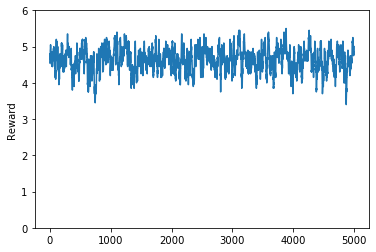

In [21]:
w = 20
dPh = dP.full_history
dph_short = [sum(dPh[i:i+w])/w for i in range(int(len(dPh)/w))]

%matplotlib inline
plt.plot(dph_short)
plt.ylabel('Reward')
plt.ylim(0, 6)
plt.show()